1. Mengidentifikasi perokok tertinggi dan terendah berdasarkan kelompok umur dan wilyah.
- Kelompok umur mana yang memiliki persentase merokok tertinggi?
- Perbedaan mencolok antar kelompok umur
- wilayah mana yang memiliki tingkat perokok tertinggi
- Perbandingan wilayah dengan persentase merokok tertinggi


2. Mengetahui perubahan tren perokok dari perbandingan antar tahun
- tahun berapa terjadi kenaikan atau penurunan tingkat merokok menurut usia
- wilayah mana yang mengalami perubahan signifikan?
- perubahan rata-rata wilayah antar tahun

3. Analisa pola umum dari data
- korelasi data antara kelompok umur dan persentase perokok


In [40]:
#import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data1 = pd.read_csv("data_csv/dataB/2020b.csv")
data2 = pd.read_csv("data_csv/dataB/2021b.csv")
data3 = pd.read_csv("data_csv/dataB/2022b.csv")
data4 = pd.read_csv("data_csv/dataB/2023b.csv")

#cek struktur data
# data.info()
# data
gdata = pd.concat([data1,data2,data3,data4])
# hgdata = gdata.groupby("Wilayah")
gdata.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Wilayah,108,27,Bogor,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Perokok 15-24,108.0,NaN,NaN,NaN,13.946111,2.410099,7.78,12.325,14.17,15.5825,18.89
Perokok 25-34,108.0,NaN,NaN,NaN,22.973611,3.261562,14.31,20.9375,23.205,25.48,29.69
Perokok 35-44,108.0,NaN,NaN,NaN,23.234167,2.146152,18.46,21.785,22.82,24.285,28.94
Perokok 45-54,108.0,NaN,NaN,NaN,19.651204,1.817134,15.31,18.47,19.495,20.5975,24.41
Perokok 55-64,108.0,NaN,NaN,NaN,12.795,2.69759,7.85,10.9475,12.43,14.835,19.54
Perokok 65+,108.0,NaN,NaN,NaN,7.778611,5.058286,2.62,5.3725,7.015,9.405,50.58
tahun,108.0,NaN,NaN,NaN,2021.5,1.123246,2020.0,2020.75,2021.5,2022.25,2023.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15332\3302745923.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rata_umur.index, y=rata_umur.values, palette="Spectral")


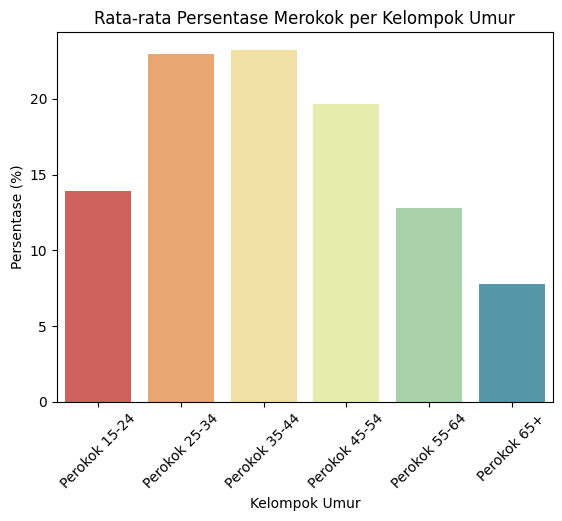

In [41]:
# Rata-rata Persentase Merokok Kelompok Umur (2020–2023)

rata_umur = gdata.drop(columns=["tahun", "Wilayah"]).mean()
sns.barplot(x=rata_umur.index, y=rata_umur.values, palette="Spectral")
# for i, v in enumerate(rata_umur.values):
#     lb.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')
plt.title("Rata-rata Persentase Merokok per Kelompok Umur")
plt.ylabel("Persentase (%)")
plt.xlabel("Kelompok Umur")
plt.xticks(rotation=45)
plt.show()

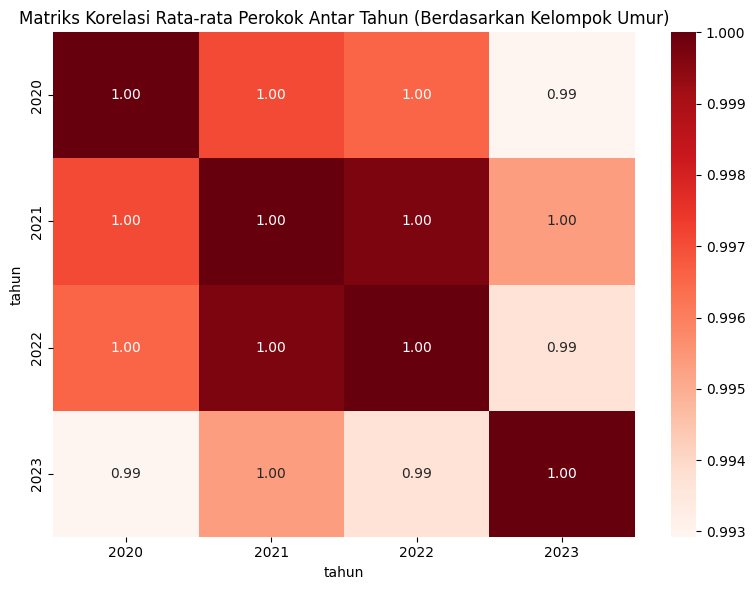

In [42]:
df_all = pd.concat([data1, data2, data3, data4], ignore_index=True)

# Ambil kolom yang berkaitan dengan perokok
smoking_columns = [col for col in df_all.columns if "Perokok" in col]

# Hitung rata-rata untuk tiap kelompok umur per tahun
mean_by_year = df_all.groupby("tahun")[smoking_columns].mean()

# Transpose agar: baris = kelompok umur, kolom = tahun
avg_by_year = mean_by_year.transpose()

# Hitung korelasi antar tahun
correlation_between_years = avg_by_year.corr()

# Visualisasikan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_between_years, annot=True, cmap='Reds', fmt=".2f")
plt.title("Matriks Korelasi Rata-rata Perokok Antar Tahun (Berdasarkan Kelompok Umur)")
plt.tight_layout()
plt.show()

In [43]:
# korelasi

# yearr = pd.concat([data1, data2, data3, data4], ignore_index=True)

# # korelasi matriks Rata-rata perokok kelompok umur
# smoking_columns = [col for col in yearr.columns if "Perokok" in col]

# # Hitung rata-rata per tahun
# mean_by_year = yearr.groupby("tahun")[smoking_columns].mean()

# # Hitung korelasi
# correlation_matrix = mean_by_year.corr()

# # Visualisasi heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title("Matriks Korelasi Rata-Rata Perokok per Kelompok Umur (2020–2023)")
# plt.tight_layout()
# plt.show()

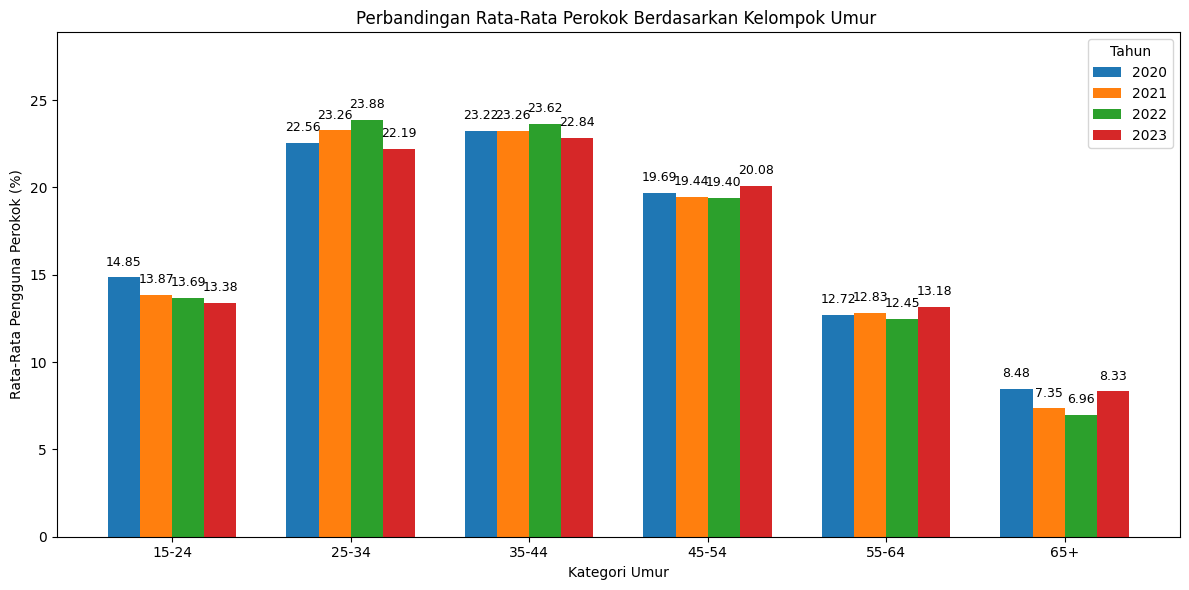

In [ ]:
yearr = pd.concat([data1, data2, data3, data4], ignore_index=True)
smoking_columns = [col for col in yearr.columns if "Perokok" in col]

# Hitung rata-rata per tahun dan kelompok umur
mean_by_year = yearr.groupby("tahun")[smoking_columns].mean()
mean_by_year = mean_by_year.T
mean_by_year.index = [col.replace("Perokok ", "") for col in mean_by_year.index]

# Siapkan sumbu dan parameter bar
labels = mean_by_year.index
x = np.arange(len(labels))
width = 0.18  # Lebih kecil agar tidak menempel

fig, ax = plt.subplots(figsize=(12, 6))

# Buat bar untuk masing-masing tahun
bars_2020 = ax.bar(x - 1.5*width, mean_by_year[2020], width, label='2020')
bars_2021 = ax.bar(x - 0.5*width, mean_by_year[2021], width, label='2021')
bars_2022 = ax.bar(x + 0.5*width, mean_by_year[2022], width, label='2022')
bars_2023 = ax.bar(x + 1.5*width, mean_by_year[2023], width, label='2023')

# menambahkan angka di atas bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)

# Label
add_labels(bars_2020)
add_labels(bars_2021)
add_labels(bars_2022)
add_labels(bars_2023)

# Pengaturan visual
ax.set_xlabel("Kategori Umur")
ax.set_ylabel("Rata-Rata Pengguna Perokok (%)")
ax.set_title("Perbandingan Rata-Rata Perokok Berdasarkan Kelompok Umur")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(title="Tahun")
plt.ylim(0, max(mean_by_year.max()) + 5)
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15332\1631887768.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_25_34.values, y=age_25_34.index, palette="viridis")


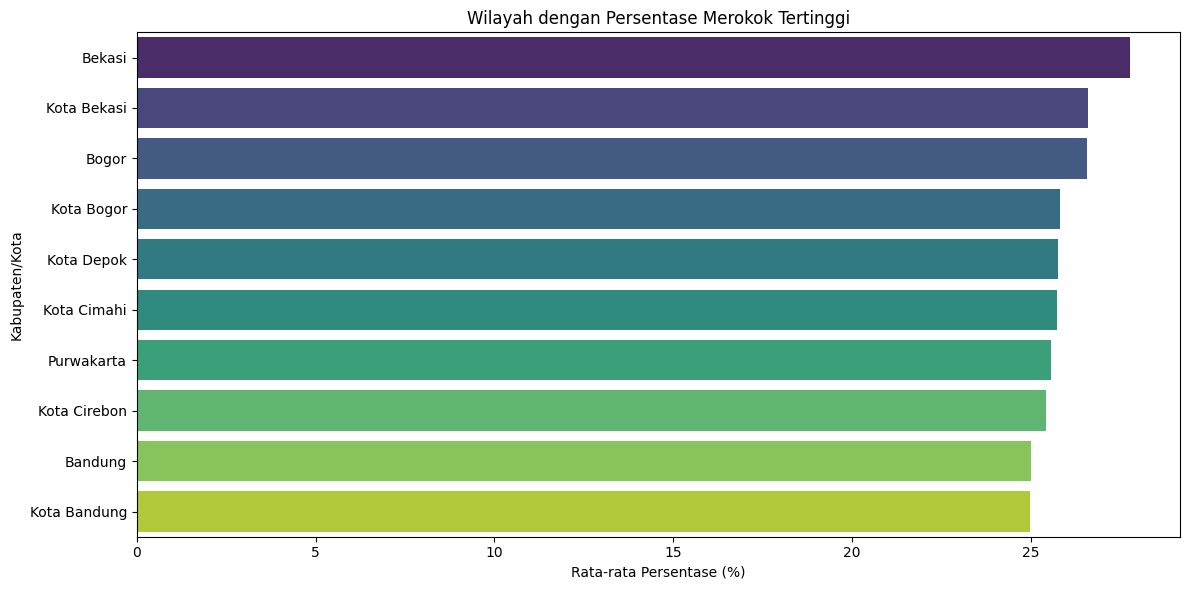

In [45]:
# Wilayah dengan Persentase Merokok Tertinggi (Usia 25–34 Tahun)
age_25_34 = gdata.groupby("Wilayah")["Perokok 25-34"].mean().sort_values(ascending=False).head(10)

# Bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=age_25_34.values, y=age_25_34.index, palette="viridis")
plt.title("Wilayah dengan Persentase Merokok Tertinggi")
plt.xlabel("Rata-rata Persentase (%)")
plt.ylabel("Kabupaten/Kota")
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15332\2864130322.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_total.values, y=top_total.index, palette="rocket")


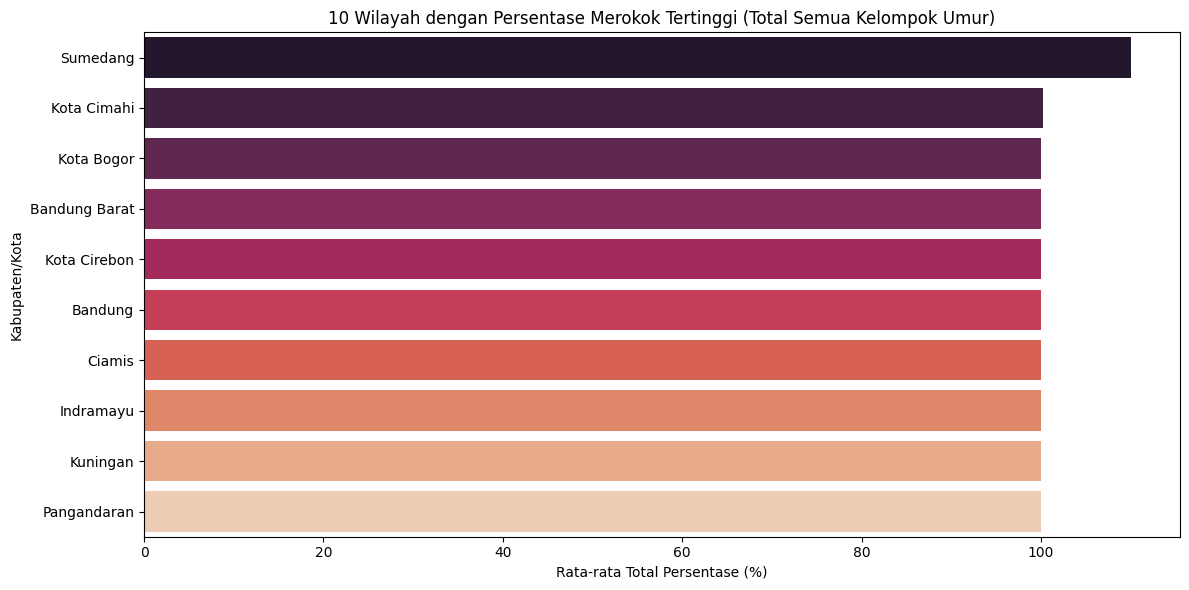

In [46]:
# Hitung total persentase untuk setiap baris
gdata["Total_Persentase"] = gdata.drop(columns=["Wilayah", "tahun"]).sum(axis=1)

# Ambil rata-rata total per wilayah
top_total = gdata.groupby("Wilayah")["Total_Persentase"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_total.values, y=top_total.index, palette="rocket")
plt.title("10 Wilayah dengan Persentase Merokok Tertinggi (Total Semua Kelompok Umur)")
plt.xlabel("Rata-rata Total Persentase (%)")
plt.ylabel("Kabupaten/Kota")
plt.tight_layout()
plt.show()


In [47]:
# import numpy as np
# kol_perokok = ['Perokok 15-24', 'Perokok 25-34', 'Perokok 35-44', 'Perokok 45-54', 'Perokok 55-64', 'Perokok 65+']
# for kolom in kol_perokok:
#     rata = data[(data[kolom] >= 0) & (data[kolom] <= 100)][kolom].mean()
#     data.loc[(data[kolom] < 0) | (data[kolom] > 100), kolom] = rata
# stat = data[kol_perokok].describe(include='all').T

# stat["range"] = stat["max"] - stat["min"]
# data.reset_index(inplace=True)
# stat.rename(columns={"index": "Kelompok Umur"}, inplace=True)

# stat.describe(include='all').T
# data2.describe(include='all').T
# data

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# === 1. Baca file CSV untuk masing-masing tahun ===
df_2020 = pd.read_csv("data_csv/2020.csv")
df_2021 = pd.read_csv("data_csv/2021.csv")
df_2022 = pd.read_csv("data_csv/2022.csv")
df_2023 = pd.read_csv("data_csv/2023.csv")

# === 2. Hitung rata-rata persentase perokok usia 15–24 tahun per tahun ===
mean_2020 = df_2020.iloc[:, 1].astype(float).mean()
mean_2021 = df_2021.iloc[:, 1].astype(float).mean()
mean_2022 = df_2022.iloc[:, 1].astype(float).mean()
mean_2023 = df_2023.iloc[:, 1].astype(float).mean()

# === 3. Buat dataframe tren historis ===
years = [2020, 2021, 2022, 2023]
averages = [mean_2020, mean_2021, mean_2022, mean_2023]

trend_df = pd.DataFrame({
    'Tahun': years,
    'Rata-rata Persentase': averages
})

# === 4. Buat model regresi linier untuk prediksi ===
X = trend_df['Tahun'].values.reshape(-1, 1)
y = trend_df['Rata-rata Persentase'].values

model = LinearRegression()
model.fit(X, y)

# === 5. Prediksi untuk tahun 2024 dan 2025 ===
future_years = np.array([2024, 2025]).reshape(-1, 1)
future_preds = model.predict(future_years)

# Gabungkan hasil prediksi ke dataframe
predicted_df = pd.DataFrame({
    'Tahun': [2024, 2025],
    'Prediksi Persentase': future_preds
})

# === 6. Plot tren dan prediksi ===
plt.figure(figsize=(9, 5))
plt.plot(years, averages, marker='o', label='Data Aktual')
plt.plot([2024, 2025], future_preds, marker='o', linestyle='--', color='orange', label='Prediksi')
plt.title('Prediksi Persentase Perokok Usia 15–24 Tahun di Jawa Barat (2020–2025)')
plt.xlabel('Tahun')
plt.ylabel('Persentase (%)')
plt.grid(True)
plt.legend()
plt.xticks(years + [2024, 2025])
plt.tight_layout()
plt.show()

# === 7. Tampilkan prediksi numerik ===
print(predicted_df)


ModuleNotFoundError: No module named 'sklearn'

Dari Grafik ini menunjukkan tren rata rata persentase perokok usia 15-24 tahun di jawa barat selama 4 tahun terakhir
- 2020: sekitar 14.88%
- 2021: sekitar 13.89%
- 2022: sekitar 13.70%
- 2023: sekitar 13.41%

Tren menunjukkan penurunan bertahap dari tahun 2020 hingga 2023

Prediksi untuk tahun 2024:
Terdapat dua kemungkinan yang dapat terjadi yaitu, terjadi perubahan signifikan (penurunan), dan tidak ada perubahan signifikan untuk 2024

prediksi untuk tahun 2025:
Terdapat dua kemungkinan juga yang sama seperti tahun 2024 yaitu terjadi perubahan signifikan (penurunan), atau tidak ada perubahan yang signifikan

# Interpretasi (2024 - 2025) #

Dari model yang kita gunakan, yaitu model linear regression.
- Model memprediksi bahwa persentase perokok remaja akan menurun secara bertahap hingga tahun 2025 dan seterusnya
- Penurunan ini bersifat moderat namun konsisten, berdasarkan tren dari 2020 hingga 2023